In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scraped-data3/SentimentAnalysis (1).csv


In [2]:
# installing necessary libraries
!pip install newspaper3k

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 5.5 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=9ffa646d0f90438cf9329011e34eb5a50a4b8b021025d0071eecd824a394307a
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=8695ebbcfdac5f212e955e2f4c064750b1f584e85a3107229f5f87614ab99fa7
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc933

In [3]:
pip install lxml_html_clean

Note: you may need to restart the kernel to use updated packages.


In [4]:
# this is the code i used  scrape 204 sentences
from newspaper import Article
paths = [
    "https://www.bbc.com/news/live/c1dr7vy39eet",
    "https://www.theguardian.com/environment/2024/dec/17/down-to-earth-long-read-special?utm_source=chatgpt.com",
    "https://www.theguardian.com/lifeandstyle/2025/apr/03/the-leaves-fall-off-but-i-think-thats-normal-the-houseplants-you-just-cant-kill?utm_source=chatgpt.com",
    "https://www.theguardian.com/science/2025/apr/03/eddie-ogorman-obituary?utm_source=chatgpt.com"
]

sentences = []

for path in paths:
    try:
        article = Article(path)
        article.download()
        article.parse()
        
        sentences.extend(article.text.split("."))
    
    except Exception as e:
        print(f"Error processing {path}: {e}")

print(len(sentences))

206


In [5]:
# i tried taking a look at the sentences that were scraped 
for i, sentence in enumerate(sentences):
    print(f"{sentence.strip()}")


Trump touts stock market 'boom' while global markets tumble

Jacqueline Howard

Live reporter

Image source, Reuters Image caption, Trump arriving in Miami earlier today

As investors watched the US stock market take its biggest one-day dive since the pandemic in 2020, the message from the White House to Wall Street was: "Trust in President Trump"
Trump himself said markets would "boom" under his new tariff scheme as the Dow Jones, Nasdaq and S&P plunged over the course of the day
Twenty-four hours after Trump imposed minimum 10% import tariffs worldwide starting on 5 April, the US's key trading partners are mapping out their response
Canadian Prime Minister Mark Carney retaliated with 25% levies on all vehicles imported across the border, lamenting that the close relationship with the US is "now over"
In contrast, Mexican President Claudia Sheinbaum said her country would not retaliate in kind
Meanwhile, the UK has drawn up a 400-page sample list of US goods that could face future tar

In [6]:
# this is to read the scraped data into a csv file called 'scraped_data'
import pandas as pd 
file_path = r"/kaggle/input/scraped-data3/SentimentAnalysis (1).csv"
scraped_data = pd.read_csv(file_path)
scraped_data.head()

,Sentences,Target,AI Labels
0,As investors watched the US stock market take ...,0,0
1,"\nTrump himself said markets would ""boom"" unde...",2,0
2,\n\nTwenty-four hours after Trump imposed mini...,1,1
3,\n\nCanadian Prime Minister Mark Carney retali...,0,0
4,"In contrast, Mexican President Claudia Sheinb...",1,0


In [7]:
# decided to use my manual labelling to train the model,so i had to drop the AI label 
# to avoid interference
scraped_data.drop('AI Labels', axis = 1, inplace = True)

In [8]:
# observing the new scraped_data 
scraped_data.head()

,Sentences,Target
0,As investors watched the US stock market take ...,0
1,"\nTrump himself said markets would ""boom"" unde...",2
2,\n\nTwenty-four hours after Trump imposed mini...,1
3,\n\nCanadian Prime Minister Mark Carney retali...,0
4,"In contrast, Mexican President Claudia Sheinb...",1


In [9]:
# This is the preprocessing stage. Firstly, i want to get rid of all special characters 
# and excess space
import re

scraped_data['Sentences'] = scraped_data['Sentences'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
scraped_data['Sentences'] = scraped_data['Sentences'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [10]:
# observing the changes 
scraped_data.head()

,Sentences,Target
0,As investors watched the US stock market take ...,0
1,Trump himself said markets would boom under hi...,2
2,Twentyfour hours after Trump imposed minimum 1...,1
3,Canadian Prime Minister Mark Carney retaliated...,0
4,In contrast Mexican President Claudia Sheinbau...,1


In [11]:
# making all enteries in column 'sentences' a string 
scraped_data['Sentences'] = scraped_data['Sentences'].astype(str)

In [12]:
scraped_data['Sentences'].dtype

dtype('O')

In [13]:
# off to count vectorization 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

Tokenized = CountVectorizer()

Vectorized_Data = Tokenized.fit_transform(scraped_data['Sentences'])

# to create a new dataframe for the vectorized sentences.
Vectorized_DataFrame = pd.DataFrame(Vectorized_Data.toarray(), columns=Tokenized.get_feature_names_out())


In [14]:
# I want the vectorized data back in the original dataset 'scraped_data'
Vectorized_DataFrame = pd.DataFrame(Vectorized_Data.toarray(), columns=Tokenized.get_feature_names_out())

# dropping the sormer sentences column 
scraped_data = scraped_data.drop(columns=['Sentences'])

scraped_data = pd.concat([scraped_data, Vectorized_DataFrame], axis=1)


In [15]:
scraped_data.describe

<bound method NDFrame.describe of      Target  10  1000  100000  10th  11  14  15  1500  15cm  ...  year  years  \
0         0   0     0       0     0   0   0   0     0     0  ...     0      0   
1         2   0     0       0     0   0   0   0     0     0  ...     0      0   
2         1   1     0       0     0   0   0   0     0     0  ...     0      0   
3         0   0     0       0     0   0   0   0     0     0  ...     0      0   
4         1   0     0       0     0   0   0   0     0     0  ...     0      0   
..      ...  ..   ...     ...   ...  ..  ..  ..   ...   ...  ...   ...    ...   
199       0   0     0       0     0   0   0   0     0     0  ...     0      1   
200       2   0     0       0     0   0   0   0     0     0  ...     0      0   
201       0   0     0       0     0   0   0   0     0     0  ...     0      0   
202       0   0     0       0     0   0   0   1     0     0  ...     0      0   
203       0   0     0       0     0   0   0   0     0     0  ...     0     

In [16]:
# I'm proceeding to train the model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# defining my features 
features_selected = X = scraped_data.drop(columns=['Target'])
X = features_selected 

y = scraped_data.Target

In [17]:
X.head()

,10,1000,100000,10th,11,14,15,1500,15cm,16,...,year,years,yellow,yet,you,young,youngest,your,youre,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y.head()

0    0
1    2
2    1
3    0
4    1
Name: Target, dtype: int64

In [19]:
# splitting my data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

# training the model, LFG!!!
model = LogisticRegression(class_weight ='balanced', random_state = 15)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=15)

In [20]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [21]:
accuracy = model.score(X_val, y_val)
print(accuracy)

0.5609756097560976


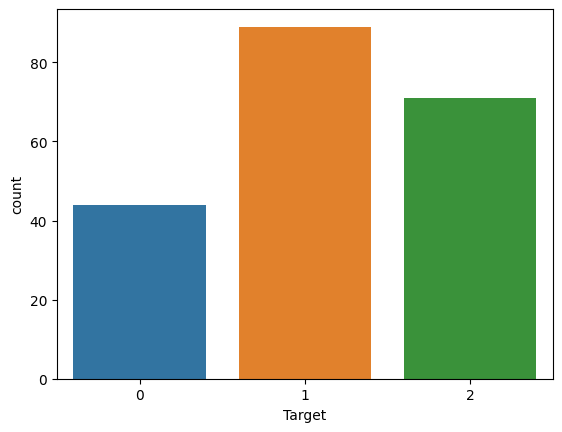

In [22]:
# i need to check if my data is imbalanced

scraped_data['Target'].value_counts()

# still on visualization 
import matplotlib.pyplot as plt
import seaborn as sns

skewness = scraped_data['Target'].value_counts()
sns.countplot(x ='Target', data = scraped_data)
plt.show()
